Usando fashion como dataset


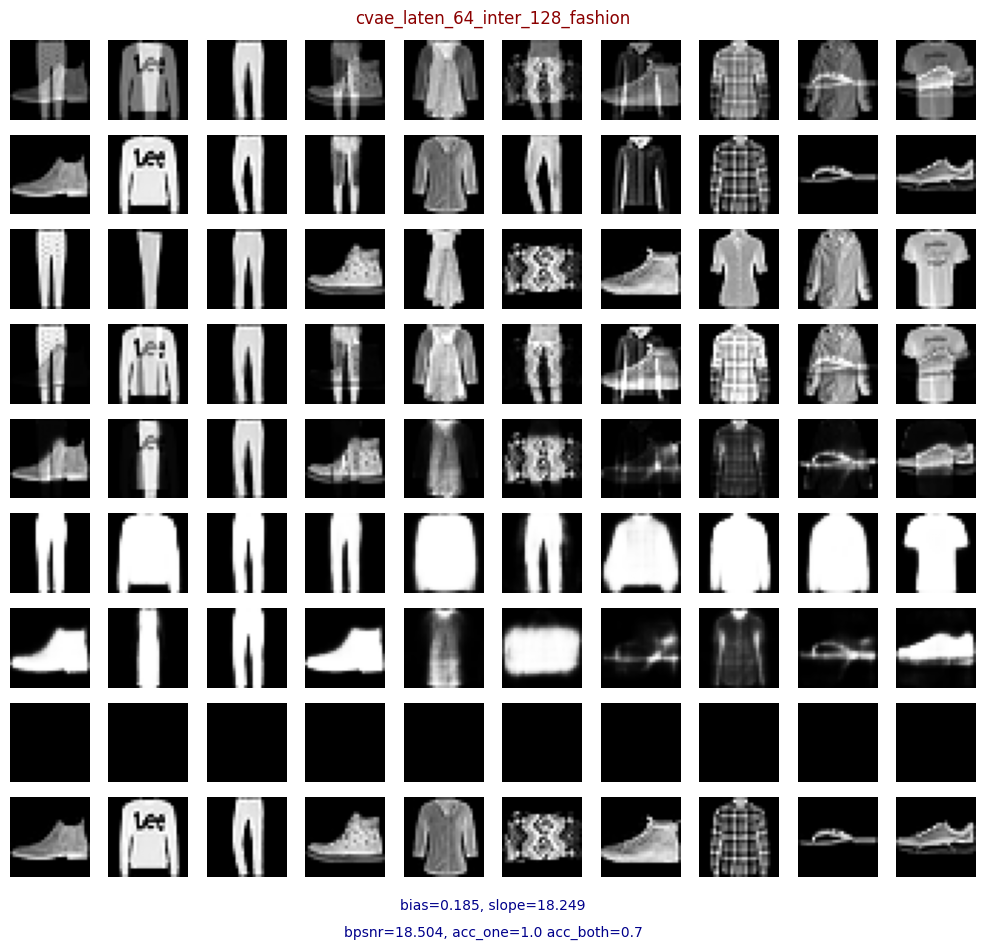

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)


# bias default: 0.22
# slope default: 22

# bias optimizados: 0.18495822150909808,
# slope optimizados: 18.248678323921897

crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.18495822150909808,slope=18.248678323921897 ,beta=1)

start =0
end =start+10

metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_image=True)


In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)

crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.2562,slope=10.0067 ,beta=1)


#crop_f0 = crop(model,predictor=predictor,
#               data=data,bias=0.18495822150909808,slope= 18.248678323921897,beta=1)

start =0
end =start+1000


metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
)


print(metrics["bpsnr"])
print(metrics["acc_at_least_one"])
print(metrics["acc_both"])


Usando fashion como dataset
(<tf.Tensor: shape=(), dtype=float32, numpy=17.941194534301758>, <tf.Tensor: shape=(), dtype=float32, numpy=2.8865158557891846>)
0.953
0.573


# Rsumen de estadisticas:(usando 1000 imagenes)

## Antes de los cambios: 
#### Parametros: bias: 0.22 slope: 22
 - Bpsnr:  bpsnr_mean:  14.926691055297852  bpsnr_std: 2.454422950744629 

 - Acc:  Acc_at_least_one: 0.969  Acc_both: 0.564
 
 ## Despues de los cambios: 
#### Parametros: bias: 0.22 slope: 22
 - Bpsnr:  bpsnr_mean:  17.96120834350586  bpsnr_std: 3.5040183067321777

 - Acc:  Acc_at_least_one: 0.966  Acc_both: 0.617
 
## Despues de los cambios y parametros optimizados: 
#### Parametros: bias=0.18495822150909808  slope= 18.248678323921897
 - Bpsnr:  bpsnr_mean:  18.392417907714844  bpsnr_std: 3.0520598888397217

 - Acc:  Acc_at_least_one: 0.967  Acc_both: 0.653
 